In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1. Обучить любую модель классификации на датасете IRIS до применения PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [2]:
def standard_scale(X):
    return (X - X.mean(axis=0))/X.std(axis=0)

In [3]:
def knn(X_train, y_train, X_test, k, w=0.25):

    # вычисление Эвклидового расстояния до каждого объекта в X1
    test_distances = np.linalg.norm(X_test[:, np.newaxis] - X_train, axis=2, ord=2)
    
    # нахождение индексов k-ближайших соседей
    k_nearest_idx = np.argpartition(test_distances, range(k))[:, :k]
    k_nearest = y_train[k_nearest_idx]

    # нулевой массив формой (<кол-во наблюдений>, <кол-во классов>)
    # строки - наблюдения
    # столбцы - номер класса
    z = np.zeros((k_nearest.shape[0], len(set(y_train))))
    
    rows = range(z.shape[0])
    # запись в массив значений в соответствии с номером соседа
    for i in range(k):
        z[rows, k_nearest[:, i]] += w**(i+1)
    
    # определение индекса (номера класса) максимального значения для каждого наблюдения
    answers = np.argmax(z, axis=1)
    
    return answers

In [4]:
def calc_accuracy(y, y_pred):
    if not isinstance(y, (np.ndarray, list)) or not isinstance(y_pred, (np.ndarray, list)):
        raise TypeError('input must be a numpy.ndarray or list')
    else:
        y, y_pred = np.array(y), np.array(y_pred)
        if y.shape != y_pred.shape:
            raise ValueError(f'shape mismatch: "y" has shape {y.shape} and "y_pred" has shape {y_pred.shape}')
        else:
            return sum(y == y_pred)/(y.shape[0] + 1e-16)

In [5]:
def PCA(x, n_components):
    # собственные значения и векторы ковариационной матрицы
    eig_vals, eig_vecs = np.linalg.eig(x.T @ x)
    # срез по индексам собственных значений, отсортированных по убыванию
    indices = np.argsort(eig_vals)[::-1][:n_components]
    # веса
    w = eig_vecs[:, indices]
    return x @ w

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [7]:
X_centered = standard_scale(X)

In [8]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, random_state=42)

y_pred = knn(X_train, y_train, X_test, 3)

calc_accuracy(y_test, y_pred)

0.9666666666666667

In [22]:
X_reduced = PCA(X_centered, 2)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

y_pred = knn(X_train, y_train, X_test, 3)

calc_accuracy(y_test, y_pred)

0.8666666666666667

После применения метода главных компонент метрика accuracy снизилась. 

Потеря информации была незначительной, но для тех объектов, на которых ошиблась модель эта информация оказалась решающей.

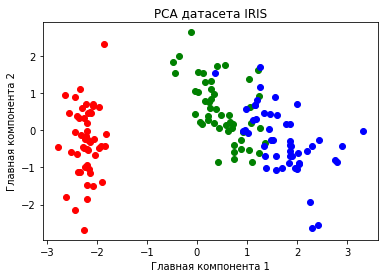

In [19]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

### 2. * Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [20]:
def PCA_svd(x, n_components):
    _, S, V = np.linalg.svd(x.T @ x)
    indices = np.argsort(S)[::-1][:n_components]
    w = V.T[:, indices]
    return x @ w

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, random_state=42)

y_pred = knn(X_train, y_train, X_test, 3)

calc_accuracy(y_test, y_pred)

0.9666666666666667

In [24]:
X_reduced = PCA_svd(X_centered, 2)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

y_pred = knn(X_train, y_train, X_test, 3)

calc_accuracy(y_test, y_pred)

0.8666666666666667

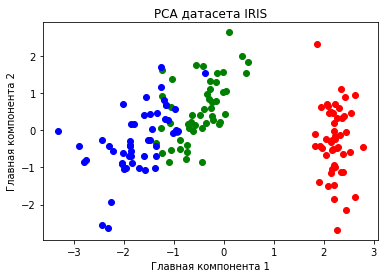

In [25]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()